In [1]:
"""
Jan_18_Employee_Attrition

Attrition of employees if not predicted correctly can lead to losing 
valuable people, resulting in reduced efficiency of the organisation, 
reduced morale among team members etc
Hence it is necessary to correctly predict which employee is likely to leave, 
ie reduce the number of False Negatives.
In other words, our objective in this case would be to increase Recall (TP/(TP+FN))
"""

'\nJan_18_Employee_Attrition\n\nAttrition of employees if not predicted correctly can lead to losing \nvaluable people, resulting in reduced efficiency of the organisation, \nreduced morale among team members etc\nHence it is necessary to correctly predict which employee is likely to leave, \nie reduce the number of False Negatives.\nIn other words, our objective in this case would be to increase Recall (TP/(TP+FN))\n'

In [2]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

df=pd.read_csv("cleaned_dataset_Attrition.csv")

In [3]:
#Data Exploration
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
# Set to view all the dataset

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)

df.head(100)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [5]:
# check for number of unique values in each column

nunique_col = df.apply(pd.Series.nunique)
nunique_col

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [6]:
# """
# employee count, employee no., standrad hours are having 
# no significance with output because it has one unique value.
# """

In [7]:

# df=df.drop(["EmployeeCount","EmployeeNumber","StandardHours","Over18"],axis=1)


In [8]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
#No Missing Value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [13]:
#There are 8 categorical variables. We have to create dummy variables of the same.

In [14]:
train1=df.copy()

In [15]:
#Approach I

In [16]:

train1["BusinessTravel"]=train1["BusinessTravel"].astype("category").cat.codes
train1["Department"]=train1["Department"].astype("category").cat.codes
train1["EducationField"]=train1["EducationField"].astype("category").cat.codes
train1["Gender"]=train1["Gender"].astype("category").cat.codes
train1["JobRole"]=train1["JobRole"].astype("category").cat.codes
train1["MaritalStatus"]=train1["MaritalStatus"].astype("category").cat.codes
train1["OverTime"]=train1["OverTime"].astype("category").cat.codes

In [17]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int8  
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int8  
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int8  
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int8  
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   int8  
 14  JobSatisfaction         

In [18]:
# approach 2

In [19]:
X20=df.copy()

In [20]:
X20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [22]:
X20["BusinessTravel"]=encoder.fit_transform(X20["BusinessTravel"])
X20["Department"]=encoder.fit_transform(X20["Department"])
X20["EducationField"]=encoder.fit_transform(X20["EducationField"])
X20["Gender"]=encoder.fit_transform(X20["Gender"])
X20["JobRole"]=encoder.fit_transform(X20["JobRole"])
X20["MaritalStatus"]=encoder.fit_transform(X20["MaritalStatus"])
X20["OverTime"]=encoder.fit_transform(X20["OverTime"])


In [23]:
X20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   int32 
 14  JobSatisfaction         

In [24]:
X20.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,No,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,No,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,No,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [25]:
# changing the depended variable 

In [26]:
X20["Attrition"]=X20["Attrition"].map({"Yes":1,"No":0})

In [27]:
X20.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [28]:
#correlation
X20.corr()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.000074,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.056652,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.077924,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.026846,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

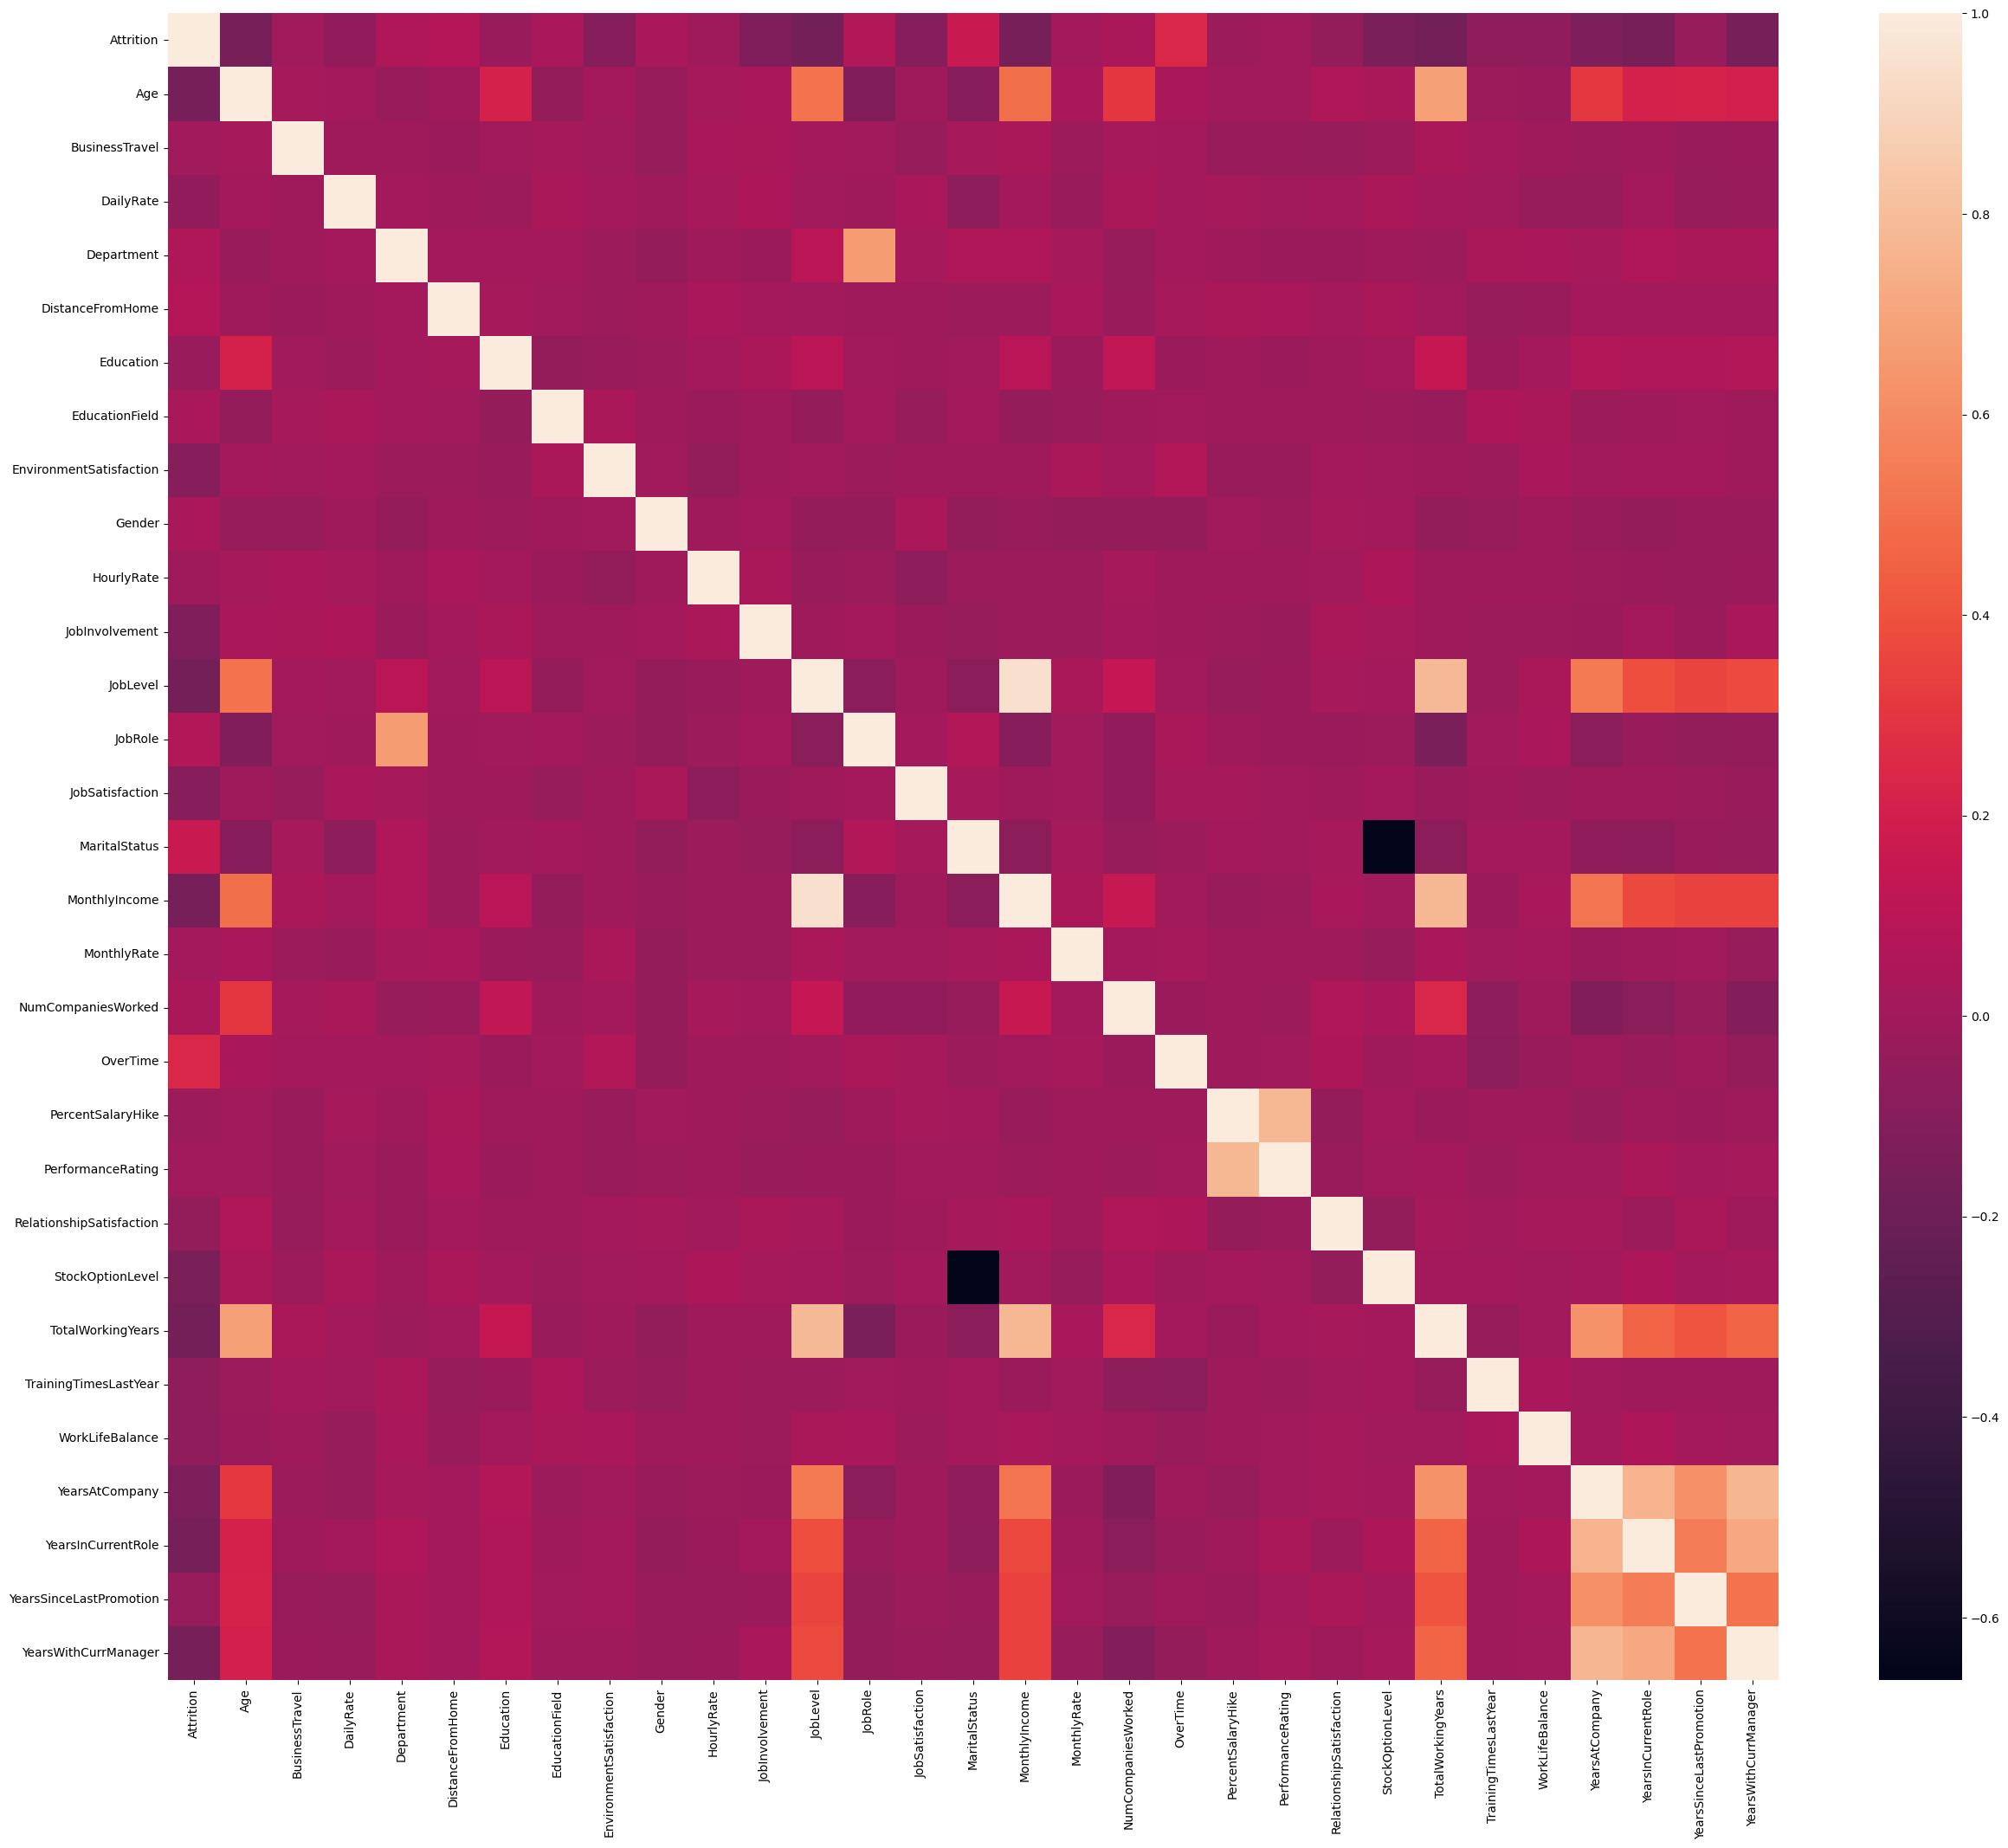

In [29]:
plt.figure(figsize=(30,25))
sns.heatmap(X20.corr())

In [30]:
#changing the index position of dependent column 

In [31]:
X200=X20.copy()
X200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [32]:
column_to_move = X200.pop("Attrition")

# insert column with insert(location, column_name, column_value)

X200.insert(30, "Attrition", column_to_move)

X200.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [33]:
X200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [34]:
corr_cols=X200.corr()

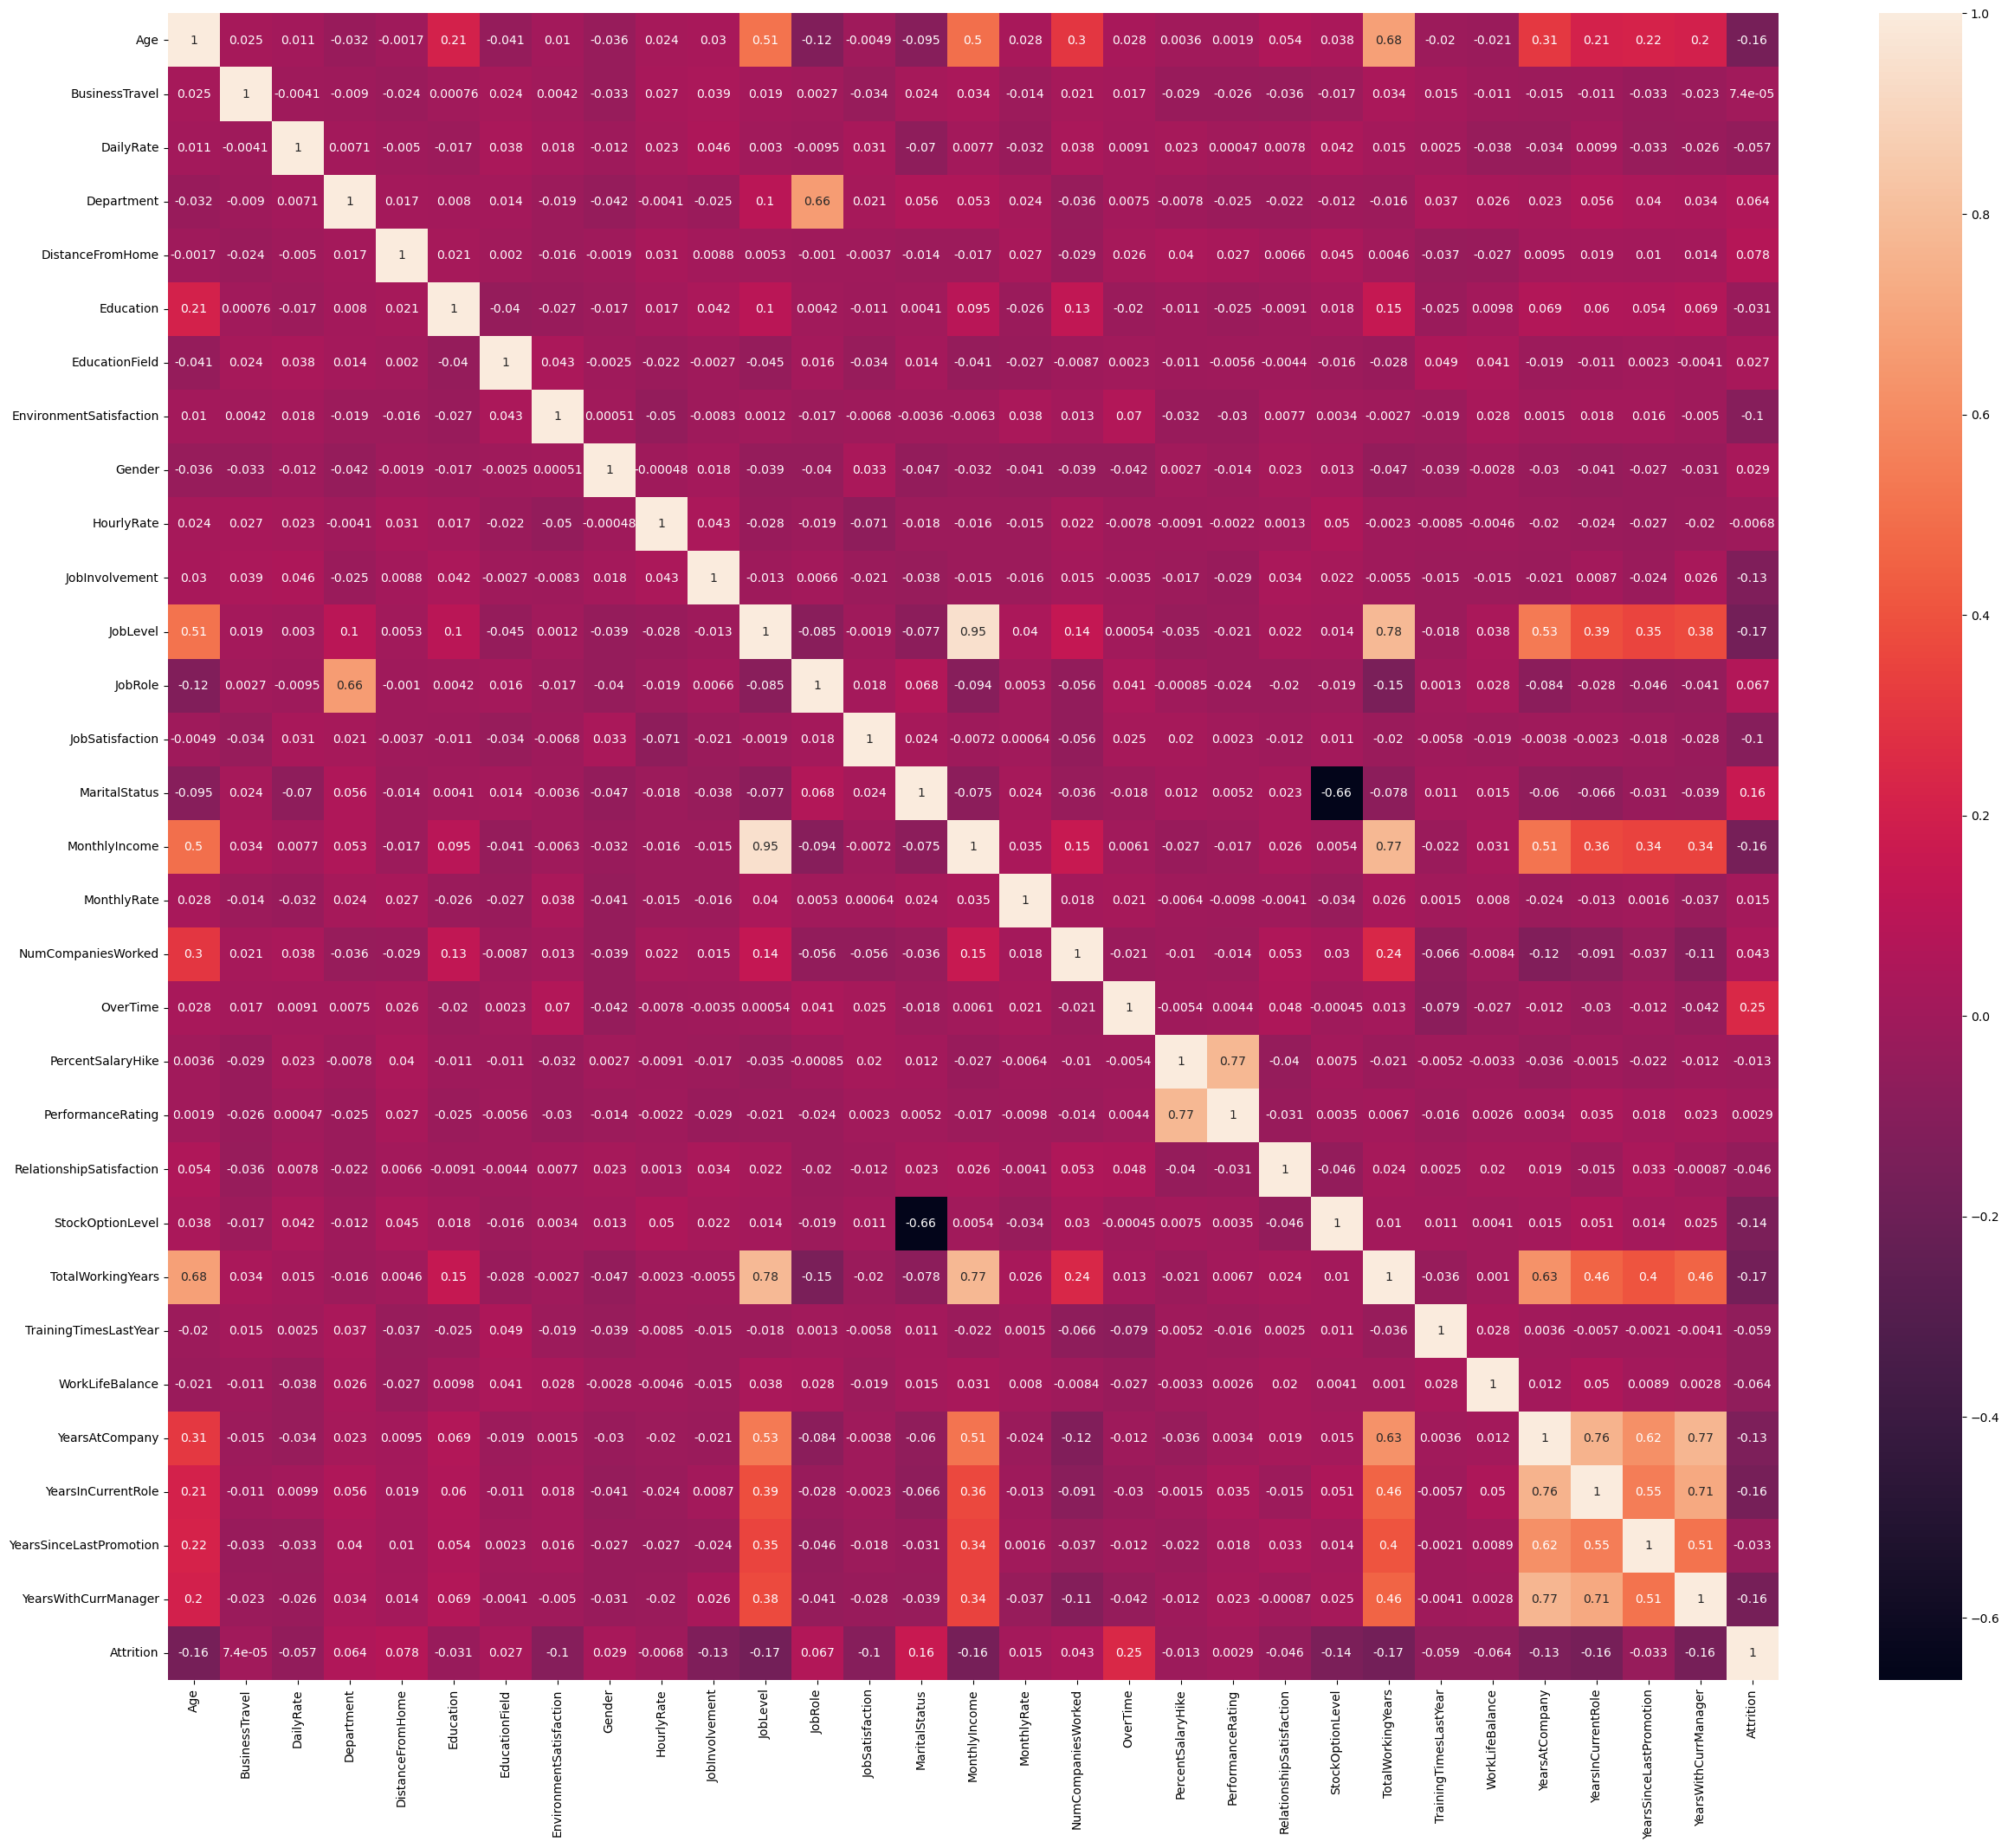

In [35]:
#correlation heatmap
plt.figure(figsize=(30,25))
sns.heatmap(corr_cols,yticklabels=True,cbar=True,linewidths=0,annot=True)
plt.show()

In [36]:
# checking correlation cofficient when large no. of columns

In [37]:
corr_high = corr_cols.unstack()
corr_high

Age        Age                        1.000000
           BusinessTravel             0.024751
           DailyRate                  0.010661
           Department                -0.031882
           DistanceFromHome          -0.001686
                                        ...   
Attrition  YearsAtCompany            -0.134392
           YearsInCurrentRole        -0.160545
           YearsSinceLastPromotion   -0.033019
           YearsWithCurrManager      -0.156199
           Attrition                  1.000000
Length: 961, dtype: float64

In [38]:
corr_high = corr_high.sort_values(ascending=False)
corr_high

Age                Age                  1.000000
MonthlyRate        MonthlyRate          1.000000
Department         Department           1.000000
DistanceFromHome   DistanceFromHome     1.000000
Education          Education            1.000000
                                          ...   
JobLevel           Attrition           -0.169105
Attrition          TotalWorkingYears   -0.171063
TotalWorkingYears  Attrition           -0.171063
StockOptionLevel   MaritalStatus       -0.662577
MaritalStatus      StockOptionLevel    -0.662577
Length: 961, dtype: float64

In [39]:
corr_high = corr_high.drop_duplicates()
corr_high.head(100)

Age                       Age                         1.000000
MonthlyIncome             JobLevel                    0.950300
JobLevel                  TotalWorkingYears           0.782208
PercentSalaryHike         PerformanceRating           0.773550
TotalWorkingYears         MonthlyIncome               0.772893
YearsAtCompany            YearsWithCurrManager        0.769212
                          YearsInCurrentRole          0.758754
YearsInCurrentRole        YearsWithCurrManager        0.714365
TotalWorkingYears         Age                         0.680381
JobRole                   Department                  0.662431
YearsAtCompany            TotalWorkingYears           0.628133
                          YearsSinceLastPromotion     0.618409
YearsSinceLastPromotion   YearsInCurrentRole          0.548056
JobLevel                  YearsAtCompany              0.534739
YearsAtCompany            MonthlyIncome               0.514285
YearsSinceLastPromotion   YearsWithCurrManager        0

In [40]:
#option I
corr_high100 = pd.DataFrame(corr_high[corr_high >= 0.60])
corr_high100.head(100)

0
Age                Age                      1.000000
MonthlyIncome      JobLevel                 0.950300
JobLevel           TotalWorkingYears        0.782208
PercentSalaryHike  PerformanceRating        0.773550
TotalWorkingYears  MonthlyIncome            0.772893
YearsAtCompany     YearsWithCurrManager     0.769212
                   YearsInCurrentRole       0.758754
YearsInCurrentRole YearsWithCurrManager     0.714365
TotalWorkingYears  Age                      0.680381
JobRole            Department               0.662431
YearsAtCompany     TotalWorkingYears        0.628133
                   YearsSinceLastPromotion  0.618409

In [41]:
#option II
corr_high50 = corr_high[corr_high >= 0.60]
corr_high50.head(100)

Age                 Age                        1.000000
MonthlyIncome       JobLevel                   0.950300
JobLevel            TotalWorkingYears          0.782208
PercentSalaryHike   PerformanceRating          0.773550
TotalWorkingYears   MonthlyIncome              0.772893
YearsAtCompany      YearsWithCurrManager       0.769212
                    YearsInCurrentRole         0.758754
YearsInCurrentRole  YearsWithCurrManager       0.714365
TotalWorkingYears   Age                        0.680381
JobRole             Department                 0.662431
YearsAtCompany      TotalWorkingYears          0.628133
                    YearsSinceLastPromotion    0.618409
dtype: float64

In [42]:
X200.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [43]:
#Splitting in dependent and independent variable

In [44]:
X = X200.drop(['Attrition'],axis=1)
Y = X200['Attrition']

In [45]:
Y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y, random_state = 0)

In [47]:
sc1 = StandardScaler()
X_train_sc = sc1.fit_transform(X_train)
X_test_sc = sc1.transform(X_test)

In [48]:
#Calculating value of n_neighbors at which error is minimum

In [49]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_sc,Y_train)
    pred_test_i = knn.predict(X_test_sc)
    test_error_rate.append(np.mean(pred_test_i != Y_test))

Text(0, 0.5, 'Error Rate')

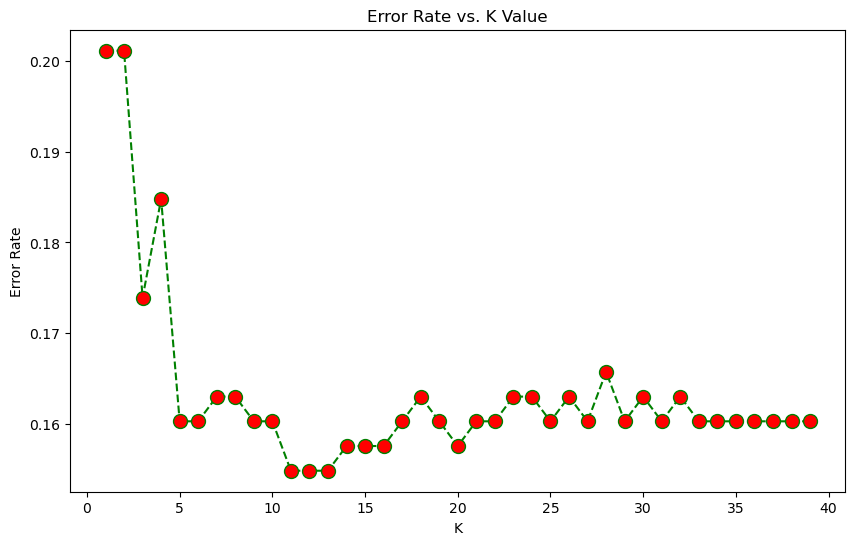

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
#Error seems minimum at K=13
knn = KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='auto', p=3)
knn.fit(X_train_sc,Y_train)
pred = knn.predict(X_test_sc)

[[307   2]
 [ 58   1]]


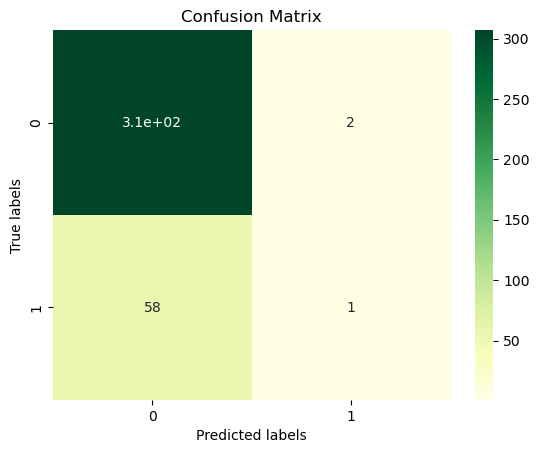

In [52]:
cm=confusion_matrix(Y_test,pred)
print(confusion_matrix(Y_test,pred))

# labels, title and ticks
ax= plt.subplot()

sns.heatmap(cm,annot=True,cmap='YlGn')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 


In [53]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       309
           1       0.33      0.02      0.03        59

    accuracy                           0.84       368
   macro avg       0.59      0.51      0.47       368
weighted avg       0.76      0.84      0.77       368



In [54]:
#Recall is very poor using KNN

In [55]:
print(accuracy_score(Y_test, pred))

0.8369565217391305


# Balancing the DataSet

In [56]:
# import SMOTE module from imblearn library
#!pip install imblearn 
#(if you don't have imblearn in your system)

In [57]:
""" three popular methods :- 
Undersampling
Oversampling
SMOTE sampling"""


' three popular methods :- \nUndersampling\nOversampling\nSMOTE sampling'

# smote approach

In [58]:
#SMOTE APPROACH
X200.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [59]:
X = X200.drop(['Attrition'],axis=1)
Y = X200['Attrition']

In [60]:
sc1 = StandardScaler()
X = sc1.fit_transform(X)


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify=Y, random_state = 0)

In [62]:
X_train.shape

(1029, 30)

In [63]:
Y_train.value_counts()

0    863
1    166
Name: Attrition, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

print("Bofore balancing X_train", X_train.shape)
print("*******"*5)
print("Bofore balancing Y_train", Y_train.shape)
print("*******"*5)
print(" no. of different class before balancing \n", Y_train.value_counts())
print("*******"*5)



Bofore balancing X_train (1029, 30)
***********************************
Bofore balancing Y_train (1029,)
***********************************
 no. of different class before balancing 
 0    863
1    166
Name: Attrition, dtype: int64
***********************************


In [65]:
print("After balancing X_train",X_train_smote.shape)
print("*******"*5)
print("After balancing Y_train",Y_train_smote.shape)
print("*******"*5)
print("After SMOTE method Dependent value counts")
Y_train_smote.value_counts()

After balancing X_train (1726, 30)
***********************************
After balancing Y_train (1726,)
***********************************
After SMOTE method Dependent value counts


0    863
1    863
Name: Attrition, dtype: int64

In [66]:
"""
sc1 = StandardScaler()
X_train_b = sc1.fit_transform(X_train_smote)
X_test_b = sc1.transform(X_test)
"""

'\nsc1 = StandardScaler()\nX_train_b = sc1.fit_transform(X_train_smote)\nX_test_b = sc1.transform(X_test)\n'

In [67]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_smote,Y_train_smote)
    pred_test_i = knn.predict(X_test)
    test_error_rate.append(np.mean(pred_test_i != Y_test))

Text(0, 0.5, 'Error Rate')

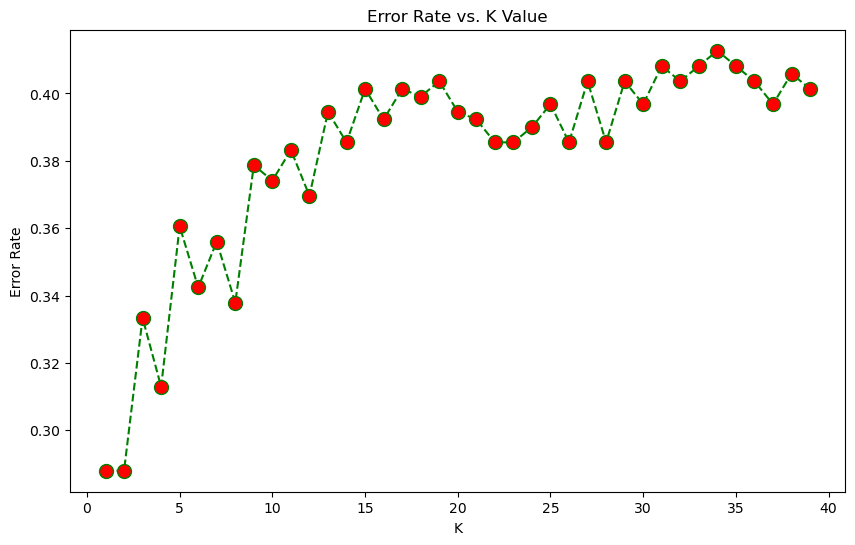

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
#Error seems minimum at K=13
knn = KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='auto', p=3)
knn.fit(X_train_smote,Y_train_smote)
pred = knn.predict(X_test)

[[207 163]
 [ 19  52]]


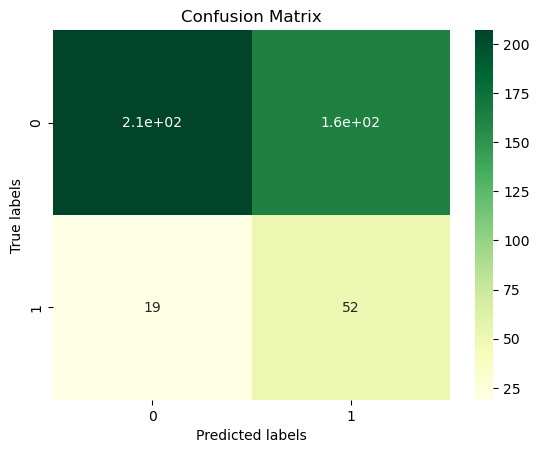

In [70]:
print(confusion_matrix(Y_test,pred))

# labels, title and ticks
cm=confusion_matrix(Y_test,pred)
ax= plt.subplot()

sns.heatmap(cm,annot=True,cmap='YlGn')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 

In [71]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69       370
           1       0.24      0.73      0.36        71

    accuracy                           0.59       441
   macro avg       0.58      0.65      0.53       441
weighted avg       0.81      0.59      0.64       441



In [72]:
print(accuracy_score(Y_test, pred))

0.5873015873015873


# UNDERSAMPLING APPROACH

In [73]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)
print(X_train_under.shape)
print(Y_train_under.shape)
print("After Random Undersampling method")
Y_train_under.value_counts()

(332, 30)
(332,)
After Random Undersampling method


0    166
1    166
Name: Attrition, dtype: int64

In [74]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_under,Y_train_under)
    pred_test_i = knn.predict(X_test)
    test_error_rate.append(np.mean(pred_test_i != Y_test))

Text(0, 0.5, 'Error Rate')

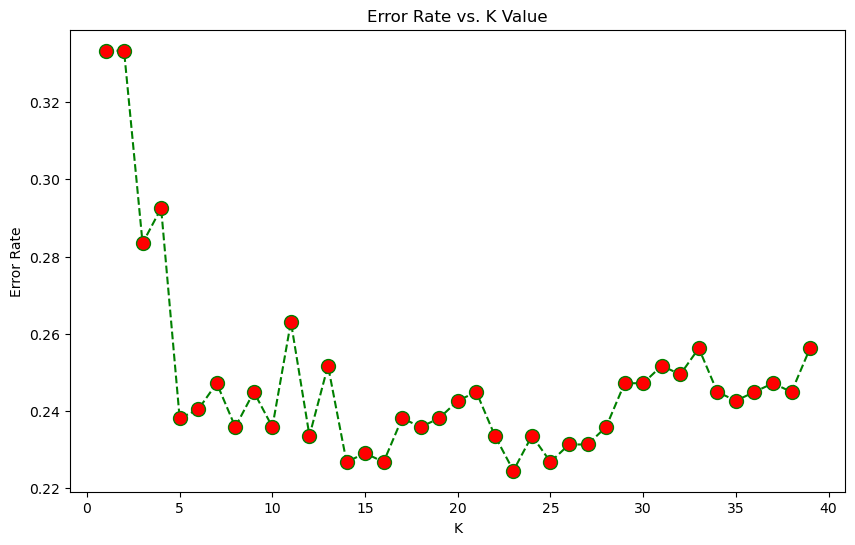

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
#Error seems minimum at K=13
knn = KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='auto', p=3)
knn.fit(X_train_under,Y_train_under)
pred = knn.predict(X_test)

[[286  84]
 [ 28  43]]


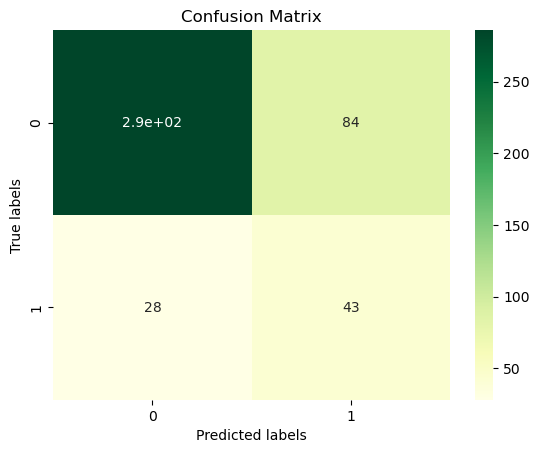

In [77]:
print(confusion_matrix(Y_test,pred))
# labels, title and ticks
cm=confusion_matrix(Y_test,pred)
ax= plt.subplot()

sns.heatmap(cm,annot=True,cmap='YlGn')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 

In [78]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       370
           1       0.34      0.61      0.43        71

    accuracy                           0.75       441
   macro avg       0.62      0.69      0.64       441
weighted avg       0.82      0.75      0.77       441



In [79]:
print(accuracy_score(Y_test, pred))

0.746031746031746


# OVERSAMPLING APPROACH

In [80]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)
print(X_train_over.shape)
print(Y_train_over.shape)
print("After Random Over sampling Method")
Y_train_over.value_counts()

(1726, 30)
(1726,)
After Random Over sampling Method


0    863
1    863
Name: Attrition, dtype: int64

In [81]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_over,Y_train_over)
    pred_test_i = knn.predict(X_test)
    test_error_rate.append(np.mean(pred_test_i != Y_test))

Text(0, 0.5, 'Error Rate')

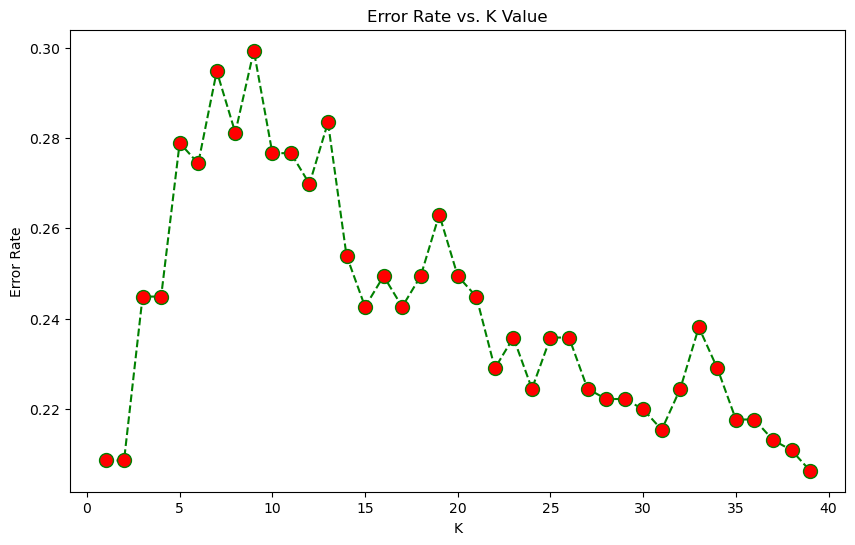

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [83]:
#Error seems minimum at K=15
knn = KNeighborsClassifier(n_neighbors=15,weights='uniform',algorithm='auto', p=1)
knn.fit(X_train_under,Y_train_under)
pred = knn.predict(X_test)

C:\Users\swara\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[282  88]
 [ 22  49]]


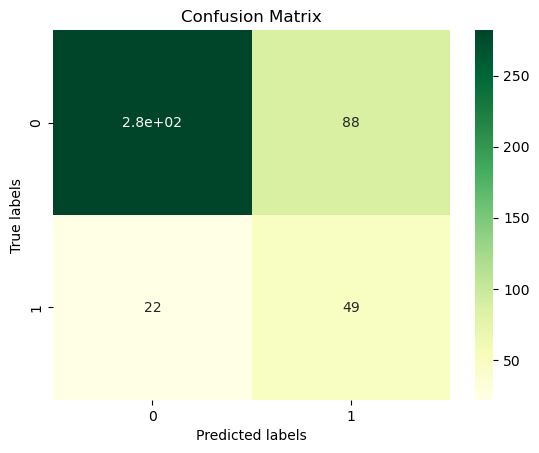

In [84]:
print(confusion_matrix(Y_test,pred))
# labels, title and ticks
cm=confusion_matrix(Y_test,pred)
ax= plt.subplot()

sns.heatmap(cm,annot=True,cmap='YlGn')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 


In [85]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       370
           1       0.36      0.69      0.47        71

    accuracy                           0.75       441
   macro avg       0.64      0.73      0.65       441
weighted avg       0.84      0.75      0.78       441



In [86]:
print(accuracy_score(Y_test, pred))

0.7505668934240363


# Support vector Machine

In [87]:
#working on imbalance dataset 

In [88]:
X200.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [89]:
X200["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [90]:
X = X200.drop(['Attrition'],axis=1)
Y = X200['Attrition']

In [91]:
sc1 = StandardScaler()
X = sc1.fit_transform(X)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y, random_state = 0)

In [93]:
from sklearn.svm import SVC #"Support vector classifier"  
 
# Building a Support Vector Machine on train data
svc_model = SVC(C=1, kernel='linear', gamma= 100)
svc_model.fit(X_train, Y_train)
 
prediction = svc_model.predict(X_test)

# check the accuracy on the training set
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test,Y_test))

0.8702359346642469
0.8804347826086957


In [94]:
print(accuracy_score(Y_test, prediction))

0.8804347826086957


In [95]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[305   4]
 [ 40  19]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.83      0.32      0.46        59

    accuracy                           0.88       368
   macro avg       0.86      0.65      0.70       368
weighted avg       0.87      0.88      0.86       368



In [96]:
# SVM with Balance Dataset

In [97]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

In [98]:
from sklearn.svm import SVC #"Support vector classifier"  
 
# Building a Support Vector Machine on train data
svc_model = SVC(C=1, kernel='linear', gamma= 100)
svc_model.fit(X_train_smote, Y_train_smote)
 
prediction1 = svc_model.predict(X_test)

# check the accuracy on the training set
print(svc_model.score(X_train_smote, Y_train_smote))
print(svc_model.score(X_test,Y_test))

0.7949134199134199
0.7364130434782609


In [99]:
print(accuracy_score(Y_test, prediction1))

0.7364130434782609


[[230  79]
 [ 18  41]]


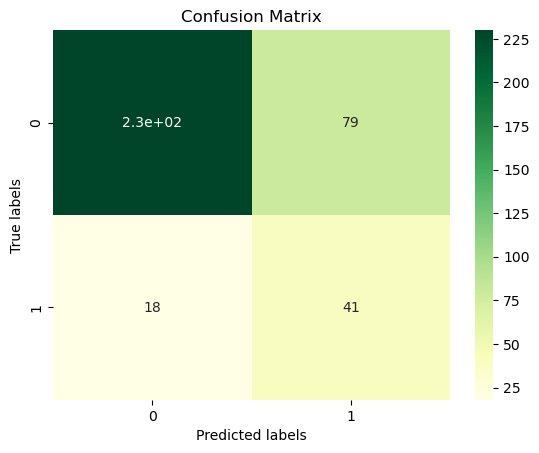

In [100]:
print(confusion_matrix(Y_test,prediction1))
# labels, title and ticks
cm=confusion_matrix(Y_test,prediction1)
ax= plt.subplot()

sns.heatmap(cm,annot=True,cmap='YlGn')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 




In [101]:
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       309
           1       0.34      0.69      0.46        59

    accuracy                           0.74       368
   macro avg       0.63      0.72      0.64       368
weighted avg       0.83      0.74      0.77       368



In [102]:
# In healthcare Recall is important.
#In Loan approval sector Recall is important.

#The opposite scenario is spam classification, where false negatives 
#are much more tolerable than false positives. 
#It doesn't matter if you occasionally find a spam email in your inbox, 
#but having good emails classified as spam can be problematic. 
#This scenario favors precision over recall.

In [103]:
#CROSS VALIDATION

In [104]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=svc_model,X=X_train,y=Y_train,cv=10)
acc

array([0.87387387, 0.86486486, 0.88181818, 0.88181818, 0.86363636,
       0.86363636, 0.83636364, 0.88181818, 0.84545455, 0.82727273])

In [105]:
acc.mean()

0.8620556920556922